In [56]:
#-*- coding:utf-8 -*-

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

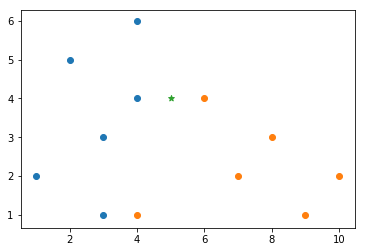

In [58]:
A_x_list = [1,3,4,2,3,4]
A_y_list = [2,3,4,5,1,6]
A_x = np.array(A_x_list)
A_y = np.array(A_y_list)
 
B_x_list = [8,7,4,6,9,10]
B_y_list = [3,2,1,4,1,2]
B_x = np.array(B_x_list)
B_y = np.array(B_y_list)
 
finding_point = [5,4]
 
plt.figure()
plt.scatter(A_x,A_y)
plt.scatter(B_x,B_y)
plt.scatter(finding_point[0],finding_point[1], marker='*')
 
plt.show()

In [59]:
def min_val(L,c):
    temp = L.copy()
    temp.sort()
    item = temp[c-1]
    return L.index(item),item

In [60]:
def AorB(k,x,y):
    numA = 0
    numB = 0
    A_xy = []
    B_xy = []
    
    for i in range(len(A_x_list)):
        A_xy.append([A_x_list[i],A_y_list[i]])
    for i in range(len(B_x_list)):
        B_xy.append([B_x_list[i],B_y_list[i]])
 
    A_distance = []
    B_distance = []
    
    for each in A_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        A_distance.append(dis)
        
    for each in B_xy:
        dis = ((each[0] - x)**2 + (each[1] - y)**2)**(1/2)
        B_distance.append(dis)
    A_result = []
    B_result = []
    
    A_min_count = 1
    B_min_count = 1
    
    # numA, numB // A 그룹의 개수, B 그룹의 개수 // k는 2 이므로 2개 이상 분류 완료 시 KNN 완료 
    
    while(numA + numB < k):
        min_A = 99999
        min_B = 99999

        _, min_A = min_val(A_distance,A_min_count)
        _, min_B = min_val(B_distance,B_min_count)
 
        if min_A < min_B:
            numA += 1
            A_min_count += 1
            #  분류한 distance값에 대한 Index를 result에 추가 
            # 이 거리값을 가지고 있는 원래의 좌표 값을 x, y에 추가 
            A_result.append(A_xy[A_distance.index(min_A)])
            # min_A의 Distance에 대한 알고리즘이 끝났으므로 -1로 설정.
            #설정 하지 않을 시 다른 좌표와 거리가 같을 때 문제가 생길 수도 있음
            A_distance[A_distance.index(min_A)] = -1
         
        elif min_A > min_B:
            numB += 1
            B_min_count += 1
            # 이 거리값을 가지고 있는 원래의 좌표 값을 x, y에 추가 
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
   
        elif min_A == min_B:
            numA += 1
            numB += 1
            A_min_count += 1
            B_min_count += 1
            A_result.append(A_xy[A_distance.index(min_A)])
            A_distance[A_distance.index(min_A)] = -1
            B_result.append(B_xy[B_distance.index(min_B)])
            B_distance[B_distance.index(min_B)] = -1
            
    if numA > numB:
        print("결과는 A 그룹입니다.")
    elif numA < numB:
        print("결과는 B 그룹입니다.")
    elif numA == numB:
        print("잘 모르겠습니다.")
    print("A 점은 ",A_result,"\nB 점은 ",B_result,"\n ")

In [61]:
k = 4
print("K = 4 , ")
AorB(k,finding_point[0],finding_point[1])

K = 4 , 
결과는 A 그룹입니다.
A 점은  [[4, 4], [3, 3], [4, 6]] 
B 점은  [[6, 4]] 
 
